# Question-1]Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\Clutering\\crime_data.csv")
print(df)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [16]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

# Normalization Function

In [17]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

# Normalized data frame (Considering Numerical part of data)

In [18]:
data_norm=norm(df.iloc[:,1:])
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


 Creating Dendrogram

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import DBSCAN

In [23]:
from scipy.cluster.hierarchy import linkage

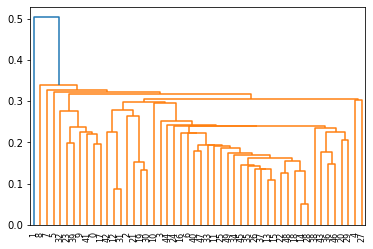

In [24]:
d1 = sch.dendrogram(sch.linkage(data_norm, method='single'))

DBSCAN Clustering¶

In [25]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(data_norm)

DBSCAN(eps=0.8, min_samples=6)

In [26]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
df['silhscore'] = dbscan.labels_

In [28]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,silhscore
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


# KMeans Clustering

In [29]:
from sklearn.cluster import KMeans

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


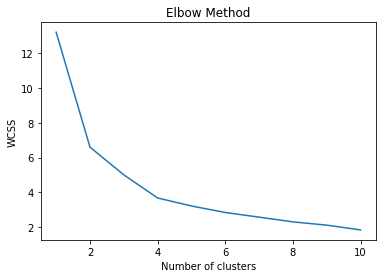

In [30]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)    
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [31]:
clusters_k = KMeans(4, random_state=42)
clusters_k.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [32]:
clusters_k.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [33]:
df['cluster_k'] = clusters_k.labels_

# Hierarchical Clustering

In [34]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [35]:
y_hc = hc.fit_predict(data_norm)
Clusters = pd.DataFrame(y_hc,columns=['Clusters_hier'])
Clusters.head()

,Clusters_hier
0,0
1,0
2,3
3,1
4,3


In [36]:
df['Clusters_hier'] = Clusters

In [37]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,silhscore,cluster_k,Clusters_hier
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,1,0
2,Arizona,8.1,294,80,31.0,0,1,3
3,Arkansas,8.8,190,50,19.5,0,2,1
4,California,9.0,276,91,40.6,0,1,3


In [38]:
df.groupby('cluster_k').agg(['mean']).reset_index() 

,cluster_k,Murder,Assault,UrbanPop,Rape,silhscore,Clusters_hier
,,mean,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,0.0,1.769231
1,1,10.966667,264.000000,76.500000,33.608333,0.0,2.750000
2,2,13.937500,243.625000,53.750000,21.412500,0.0,0.125000
3,3,5.852941,141.176471,73.647059,19.335294,0.0,1.117647


In [39]:
df.groupby('Clusters_hier').agg(['mean']).reset_index() 

,Clusters_hier,Murder,Assault,UrbanPop,Rape,silhscore,cluster_k
,,mean,mean,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375,0.0,1.875000
1,1,5.715000,132.300000,70.800000,18.1000,0.0,2.500000
2,2,3.180000,78.700000,49.300000,11.6300,0.0,0.000000
3,3,10.883333,256.916667,78.333333,32.2500,0.0,1.166667
